In [39]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
import matplotlib.pyplot as plt
import numpy as np


from collections import defaultdict, Counter

# Load eyebrow raise interaction data

In [2]:
df = pd.read_csv('mistborn-eyebrow.txt', sep='\t')
df.head(20)

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1
5,55,kelsier,vin,1
6,55,kelsier,vin,1
7,56,kelsier,vin,1
8,58,kelsier,vin,1
9,67,breeze,ham,1


* "character" = character who initiated the eyebrow raise
* "target"    = character who received the eyebrow raise

In [3]:
MAIN_CHARS = ['kelsier','vin','elend','breeze','ham','sazed','dockson']
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(MAIN_CHARS,range(len(MAIN_CHARS))))

## Group interactions by book

In [4]:
dfg = df.groupby("book")

# final empire
fe = dfg.get_group(1)
print("Final Empire count:", fe.shape[0])

# well of ascension
wa = dfg.get_group(2)
print("Well of Ascension count:", wa.shape[0])

# hero of ages 
ha = dfg.get_group(3)
print("Hero of ages count:", ha.shape[0])

Final Empire count: 53
Well of Ascension count: 48
Hero of ages count: 43


## Which characters raise their eyebrows the most?

In [9]:
fe.groupby('character')\
    .size()\
    .reset_index(name="counts")\
    .sort_values("counts", ascending=False)

,character,counts
5,kelsier,19
11,vin,8
0,breeze,6
3,ham,5
1,dockson,3
2,elend,3
9,sazed,3
6,laird,2
4,jastes,1
7,marsh,1


## Build df counting how often characters are eyebrow "raisers" vs "raisees"

In [10]:
fe_raisers = defaultdict(int,fe.character.value_counts())
print(fe_raisers)

fe_raisees = defaultdict(int,fe.target.value_counts())
print(fe_raisees)

all_chars = set(list(fe_raisers.keys()) + list(fe_raisees.keys()))
all_chars

# build raiser/raisee count df
data = [(x, fe_raisers[x], fe_raisees[x]) for x in all_chars]
raise_df = pd.DataFrame(data, columns=['character','raiser','raisee']).sort_values("raiser",ascending=False)

defaultdict(<class 'int'>, {'kelsier': 19, 'vin': 8, 'breeze': 6, 'ham': 5, 'sazed': 3, 'elend': 3, 'dockson': 3, 'laird': 2, 'jastes': 1, 'marsh': 1, 'shan': 1, 'obligator': 1})
defaultdict(<class 'int'>, {'vin': 22, 'elend': 6, 'kelsier': 6, 'sazed': 4, 'ham': 4, 'breeze': 2, 'camon': 2, 'hoyd': 1, 'yeden': 1, 'soldier': 1, 'spook': 1, 'bevidon': 1, 'tresting': 1, 'tepper': 1})


In [11]:
data_melt = raise_df.melt(id_vars='character',
                          value_vars=['raiser','raisee'],
                          var_name="eyebrow",
                          value_name="count").sort_values('count',ascending=False)
data_melt

,character,eyebrow,count
21,vin,raisee,22
0,kelsier,raiser,19
1,vin,raiser,8
24,elend,raisee,6
20,kelsier,raisee,6
2,breeze,raiser,6
3,ham,raiser,5
26,sazed,raisee,4
23,ham,raisee,4
5,dockson,raiser,3


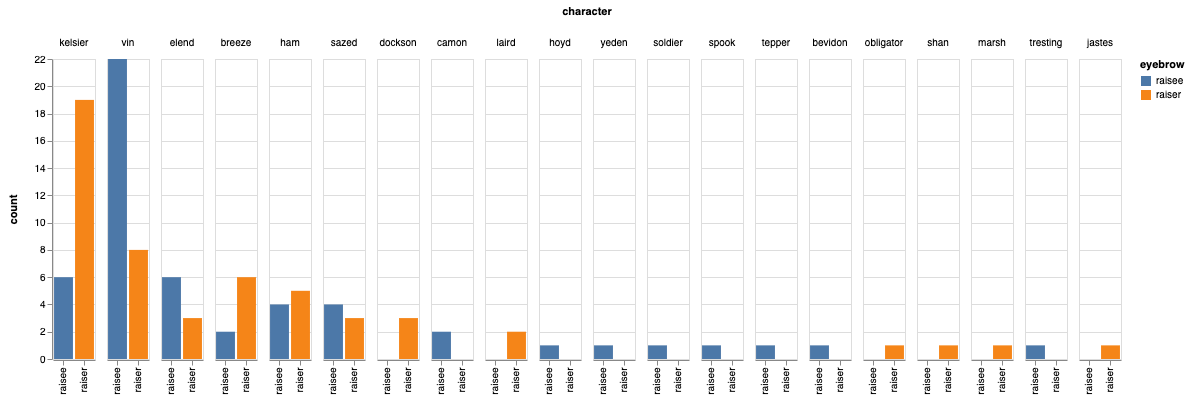

In [23]:
alt.Chart(data_melt).mark_bar().encode(
    x=alt.X('eyebrow:N',title=''),
    y='count:Q',
    column=alt.Column('character:N',sort=MAIN_CHARS),
    color='eyebrow:N'
)

In [24]:
raise_df.head()

,character,raiser,raisee
1,kelsier,19,6
7,vin,8,22
15,breeze,6,2
11,ham,5,4
10,elend,3,6


### matplot lib version of grouped bar chart

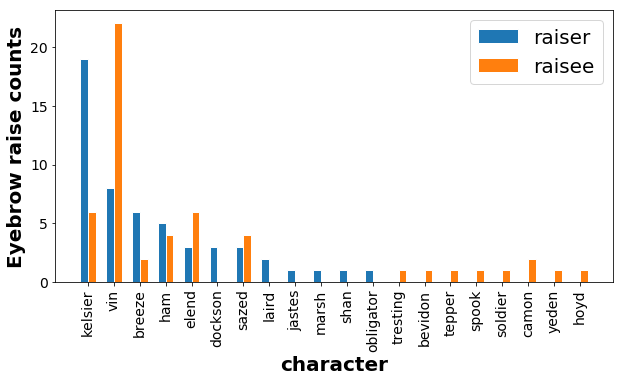

In [25]:
fig = plt.figure(figsize=(10,5))
# set width of bar
barWidth = .3

# set height of bar
bars1 = raise_df.raiser.values
bars2 = raise_df.raisee.values
# bars3 = raise_df.raiser.values
# bars4 = raise_df.raisee.values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='raiser')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='raisee')
# plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='raiser')
# plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='raisee')

# Add xticks on the middle of the group bars
plt.xlabel('character', fontweight='bold',size=20)
plt.xticks([r +barWidth/2 for r in range(len(bars1))], raise_df.character.values,rotation=90,size=14)

plt.ylabel("Eyebrow raise counts",fontweight='bold',size=20)
plt.yticks(size=14)
# Create legend & Show graphic
plt.legend(fontsize=20)
plt.show()


## Chunk the eyebrow raises

In [26]:
chunk_size = 20
max_page = df.page.max()

chunks = np.arange(0,max_page,chunk_size)
chunks

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500,
       520, 540, 560, 580, 600, 620, 640, 660, 680, 700])

In [27]:
test = fe.groupby("character")
kell = test.get_group("kelsier")

In [28]:
def get_raises_over_time(df, characters,chunk_size):
    '''
    For a given character, aggregate the number eyebrow raises within
    a given chunk size over the course of the book
    '''
    rows = []
    max_page = df.page.max()
    
    # group the df by character
    dfg = df.groupby("character")
    
    for ch in characters:
        if ch not in dfg.groups:
            continue
        char_rows = [] # rows for this character
        df_ch = dfg.get_group(ch)

        # start at chunk_size, go thru max page, skip by chunk_size intervals
        for i in np.arange(chunk_size,max_page,chunk_size):
            num_raises = df_ch[df_ch['page'].between(i-chunk_size,i)].shape[0]
            char_rows.append([ch, i,num_raises])
            
        # collec theses rows into the the full dataset
        rows += char_rows
        
    return pd.DataFrame(rows, columns=["character", "page_interval", "eyebrow_raises"])
        

In [29]:
time_df = get_raises_over_time(fe, all_chars, 50)

In [30]:
time_df.head()

,character,page_interval,eyebrow_raises
0,obligator,50,1
1,obligator,100,0
2,obligator,150,0
3,obligator,200,0
4,obligator,250,0


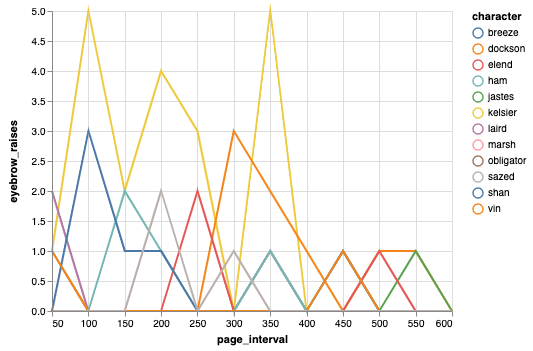

In [31]:
alt.Chart(time_df).mark_line().encode(
    x='page_interval:Q',
    y='eyebrow_raises:Q',
    color='character:N'
)

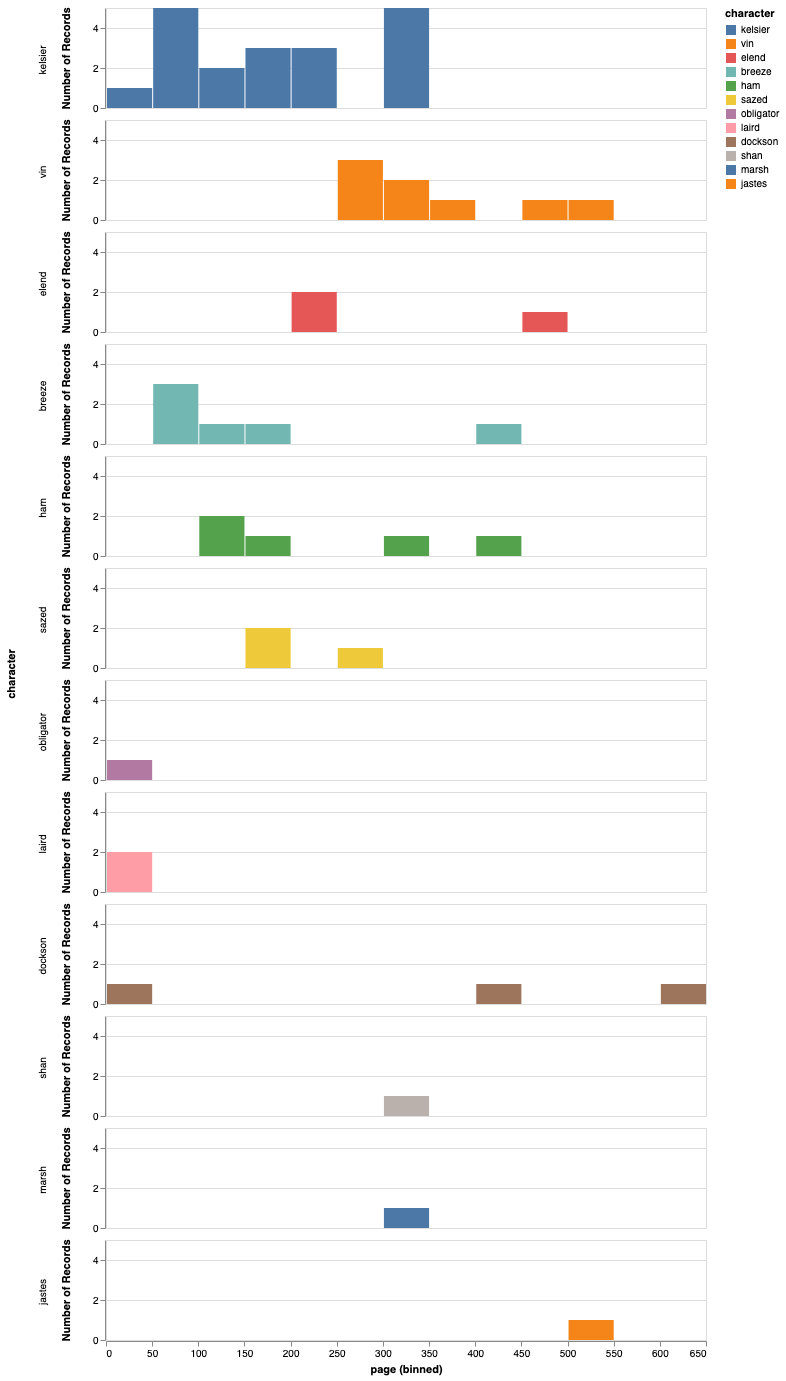

In [35]:
alt.Chart(fe,
          width=600,
          height=100
         ).mark_bar().encode(
    alt.X("page:Q", bin=alt.Bin(maxbins=20)),
    y='count()',
    row=alt.Row('character:N',sort=MAIN_CHARS),
    color=alt.Color("character:N",sort=MAIN_CHARS)
)

In [36]:
# filter and sort by main character eyebrow raises
fe_filt = fe[fe['character'].isin(MAIN_CHARS)]
fe_filt['char_order'] = fe_filt['character'].map(sorterIndex)
fe_filt.sort_values('char_order',inplace=True)
fe_filt

/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,page,character,target,book,char_order
1,8,kelsier,tepper,1,0
43,348,kelsier,ham,1,0
40,329,kelsier,vin,1,0
39,323,kelsier,vin,1,0
38,323,kelsier,vin,1,0
37,313,kelsier,hoyd,1,0
29,239,kelsier,vin,1,0
26,202,kelsier,vin,1,0
24,198,kelsier,sazed,1,0
19,158,kelsier,vin,1,0


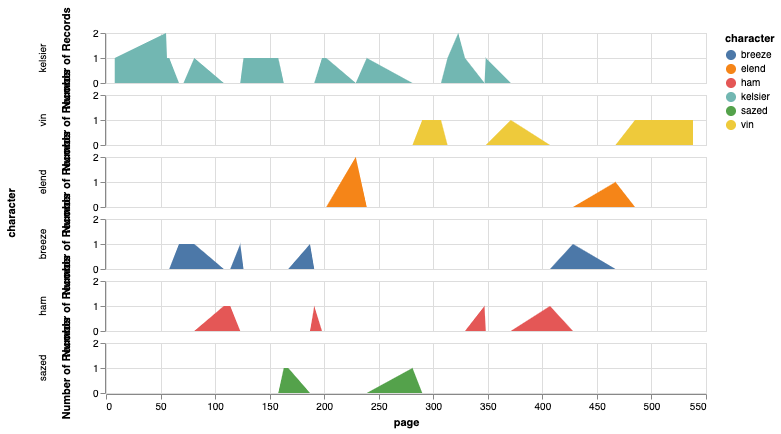

In [40]:
alt.Chart(fe_filt).mark_area().encode(
    x='page:Q',
    y='count()',
    color=alt.Color('character:N')
).properties(
    height=50, 
    width=600
).facet(
    row = alt.Row('character:N', sort=MAIN_CHARS)
)
# Color sort is acting weird... makes the areas strangley shaped....

## Visualize as stripplot

In [41]:
fe_indiv = fe.rename(
    columns={'character':'raiser','target':'raisee'}
    ).melt(id_vars='page',
                   value_vars=['raiser','raisee'],
                   var_name = "eyebrow",       
                   value_name="character")
fe_indiv.head(10)

,page,eyebrow,character
0,2,raiser,obligator
1,8,raiser,kelsier
2,25,raiser,laird
3,26,raiser,laird
4,30,raiser,dockson
5,55,raiser,kelsier
6,55,raiser,kelsier
7,56,raiser,kelsier
8,58,raiser,kelsier
9,67,raiser,breeze


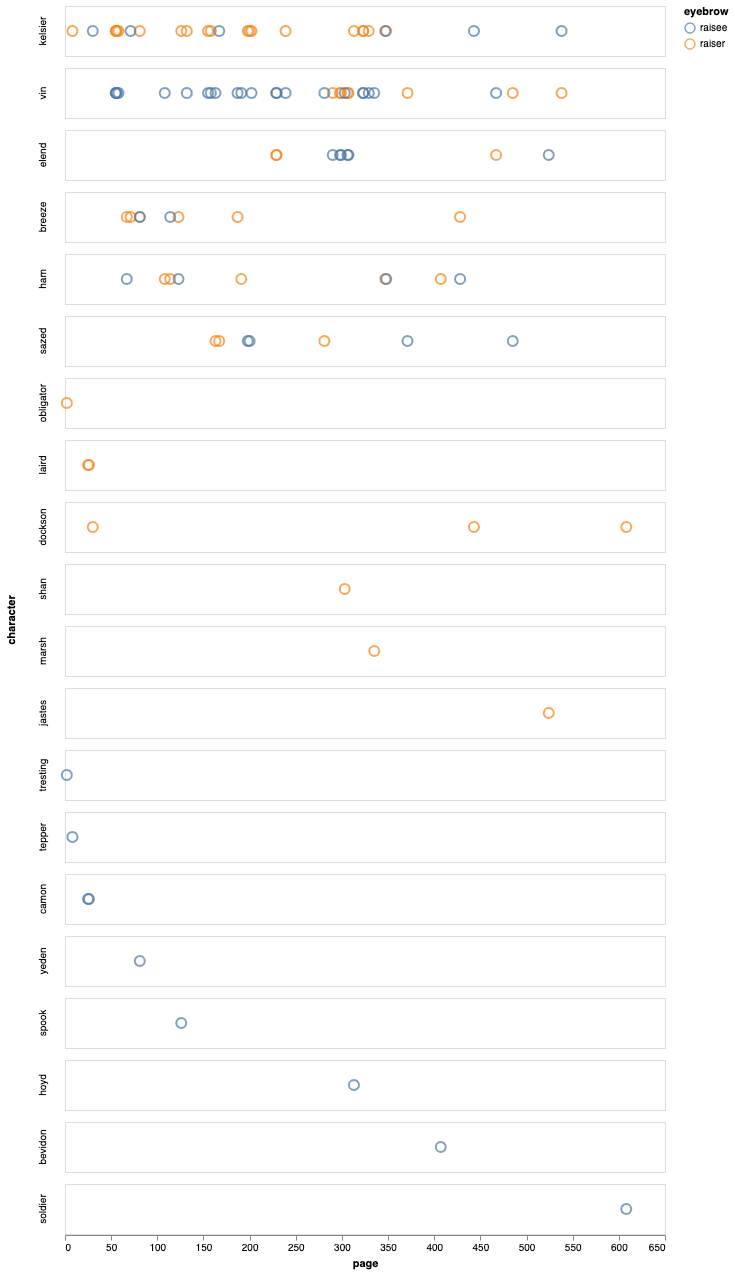

In [42]:
# Individual characters transitions between eyebrow raisers to raisees
alt.Chart(fe_indiv).mark_point(size=100).encode(
    x='page:Q',
    color=alt.Color('eyebrow:N'),
    row = alt.Row('character:N', sort=MAIN_CHARS),
).properties(
    height=50, 
    width=600
)

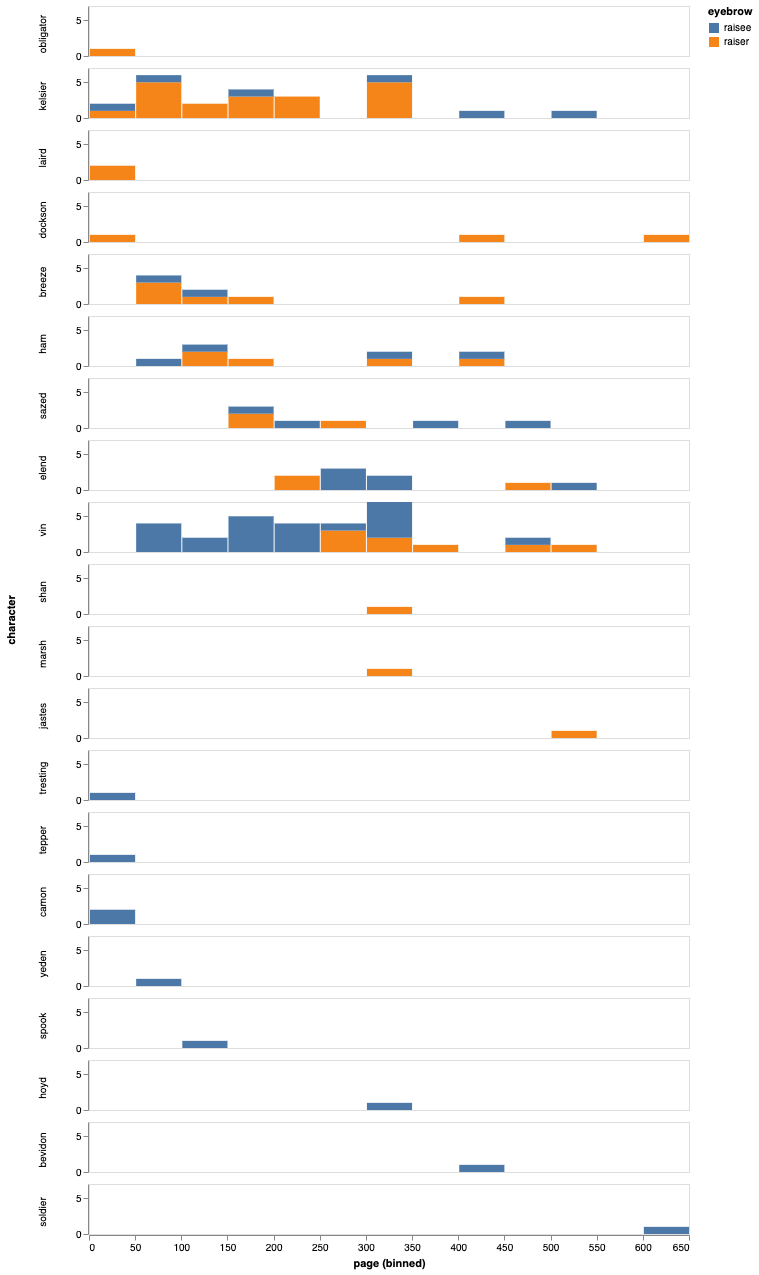

In [44]:
# Individual characters transitions between eyebrow raisers to raisees
alt.Chart(fe_indiv
).mark_bar().encode(
    x=alt.X('page:Q',bin=alt.Bin(maxbins=20)),
    y=alt.Y('count()',axis=alt.Axis(title='')),
    color=alt.Color('eyebrow:N'),
    row = alt.Row('character:N', sort=MAIN_CHARS),
).properties(
    height=50, 
    width=600
).configure_axis(
    grid=False
)


# need to update altair for this to work...

# # Individual characters transitions between eyebrow raisers to raisees
# alt.Chart(fe_indiv).transform_fold(
#     ['raiser','raisee'],
#     as_=['eyebrow:N','page:Q']
# ).mark_bar().encode(
#     x=alt.X('page:Q',bin=alt.Bin(maxbins=20)),
#     y='count()',
#     color=alt.Color('eyebrow:N'),
#     row = alt.Row('character:N', sort=MAIN_CHARS),
# ).properties(
#     height=50, 
#     width=600
# )


/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


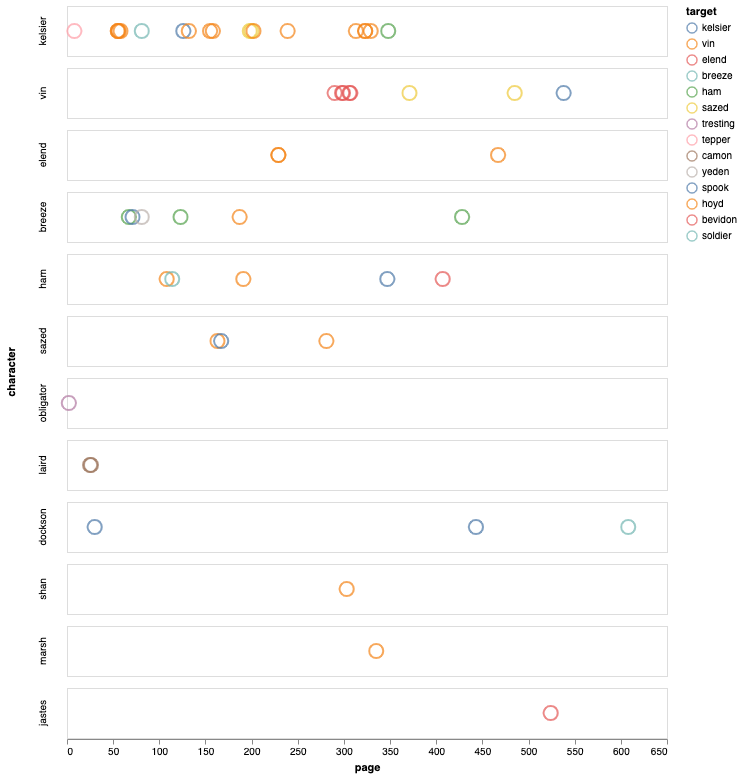

In [46]:
# Who does each character raise their eyebrows at?
alt.Chart(fe).mark_point(size=200).encode(
    x='page:Q',
    color=alt.Color('target:N', sort=MAIN_CHARS),
    row = alt.Row('character:N', sort=MAIN_CHARS),
    tooltip=['character','target'],
    #shape='target:N'
).properties(
    height=50, 
    width=600
)

/Applications/anaconda3/envs/deep/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


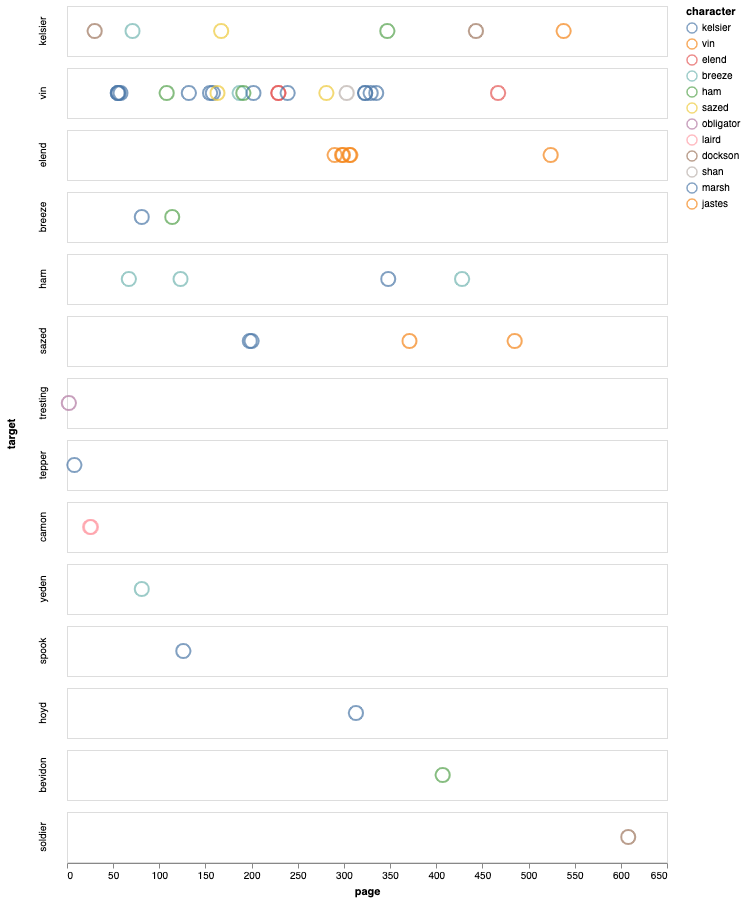

In [48]:
# Who get's eyebrows raised at them?
alt.Chart(fe).mark_point(size=200).encode(
    x='page:Q',
    color=alt.Color('character:N', sort=MAIN_CHARS),
    row = alt.Row('target:N', sort=MAIN_CHARS),
    tooltip=['character','target']
).properties(
    height=50, 
    width=600
)

## Swarm plot

In [49]:
import seaborn as sns

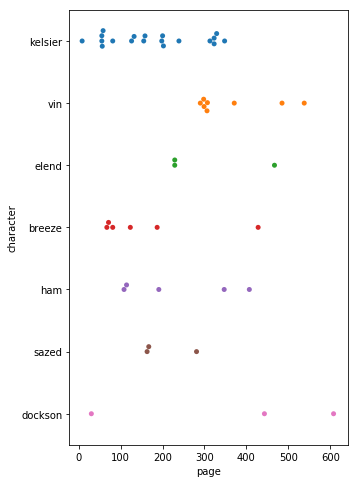

In [59]:
plt.figure(figsize=(5,8))
ax = sns.swarmplot(data=fe,
                   x="page", 
                   y="character",
                   order=MAIN_CHARS)

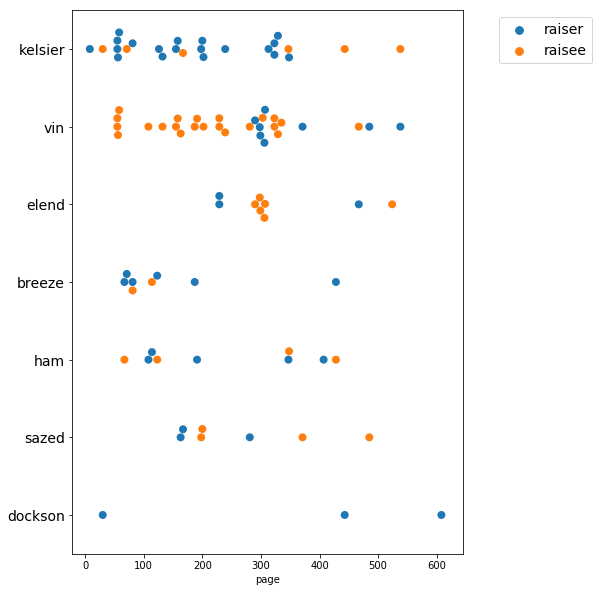

In [97]:
plt.figure(figsize=(7,10))
ax = sns.swarmplot(data=fe_indiv,
                   x="page", 
                   y="character",
                   hue='eyebrow',
                   order=MAIN_CHARS,
                   size=8)

ax.legend(fontsize=14,bbox_to_anchor=(1.35, 1), ncol=1)
plt.yticks(fontsize=14)
plt.ylabel("")

plt.show()

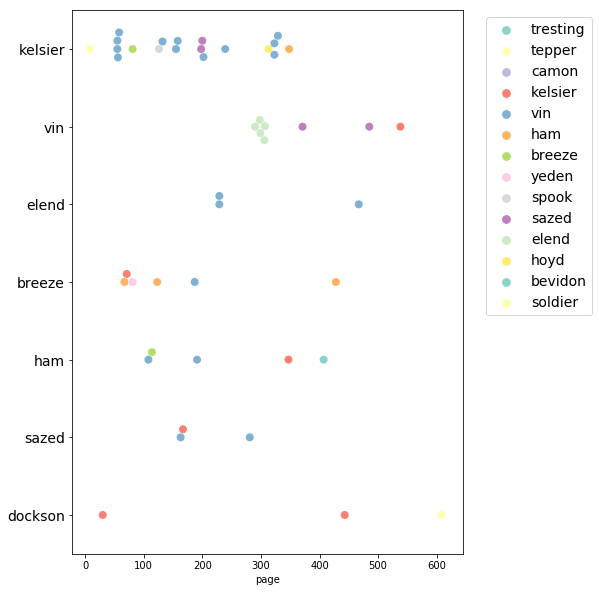

In [99]:
plt.figure(figsize=(7,10))
ax = sns.swarmplot(data=fe,
                   x="page", 
                   y="character",
                   hue='target',
                   order=MAIN_CHARS,
                   size=8,
                   palette="Set3")

ax.legend(fontsize=14,bbox_to_anchor=(1.35, 1), ncol=1)
plt.yticks(fontsize=14)
plt.ylabel("")

plt.show()

In [50]:
fe.head()

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1


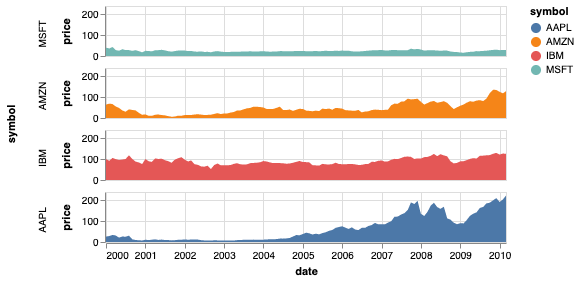

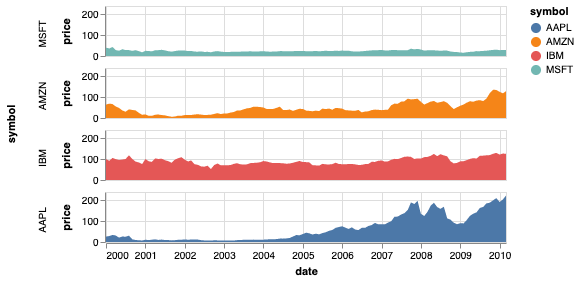

In [210]:
from vega_datasets import data

source = data.stocks()

alt.Chart(source).transform_filter(
    alt.datum.symbol != 'GOOG'
).mark_area().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N', sort=['MSFT', 'AMZN'])
).properties(height=50, width=400)

In [184]:
fe

,page,character,target,book
0,2,obligator,tresting,1
1,8,kelsier,tepper,1
2,25,laird,camon,1
3,26,laird,camon,1
4,30,dockson,kelsier,1
5,55,kelsier,vin,1
6,55,kelsier,vin,1
7,56,kelsier,vin,1
8,58,kelsier,vin,1
9,67,breeze,ham,1


## future
* swarm plot
* directed graph
* chord diagram
* landscape plot

In [28]:
# output to Json for D3
mapper = {'character':'source',0:'count'}
fe4json = fe.groupby(['character','target']).size().reset_index().rename(columns=mapper)
fe4json.head()

,source,target,count
0,breeze,ham,3
1,breeze,kelsier,1
2,breeze,vin,1
3,breeze,yeden,1
4,dockson,kelsier,2


In [31]:
fe_links = fe4json.to_json(orient='records')

In [67]:
crew = ['kelsier','dockson','breeze','ham','sazed','vin','marsh','spook']
skaa = ['camon','yeden']
nobles = ['elend','jastes','shan','tresting','tepper']
def get_mistborn_group(name):
    if name in crew:
        return 'crew'
    elif name in skaa:
        return 'skaa'
    elif name in nobles:
        return 'nobility'
    else:
        return 'extra'

color_dict = {
    'crew':'#33a02c',
    'skaa':'#ff7f00',
    'nobility':'#6a3d9a',
    'extra':'#666'
}

In [68]:
fe_interaction_counts = Counter(fe['character'].values.tolist() + fe['target'].values.tolist())
fe_nodes = pd.DataFrame.from_dict(fe_interaction_counts,orient='index').reset_index().rename(columns={'index':'name',0:'count'})
fe_nodes['group'] = fe_nodes['name'].apply(lambda x: get_mistborn_group(x))
fe_nodes['color'] = fe_nodes['group'].apply(lambda x: color_dict[x])
fe_nodes


,name,count,group,color
0,obligator,1,extra,#666
1,kelsier,25,crew,#33a02c
2,laird,2,extra,#666
3,dockson,3,crew,#33a02c
4,breeze,8,crew,#33a02c
5,ham,9,crew,#33a02c
6,sazed,7,crew,#33a02c
7,elend,9,nobility,#6a3d9a
8,vin,30,crew,#33a02c
9,shan,1,nobility,#6a3d9a


In [69]:
fe_nodes.to_json(orient='records')

'[{"name":"obligator","count":1,"group":"extra","color":"#666"},{"name":"kelsier","count":25,"group":"crew","color":"#33a02c"},{"name":"laird","count":2,"group":"extra","color":"#666"},{"name":"dockson","count":3,"group":"crew","color":"#33a02c"},{"name":"breeze","count":8,"group":"crew","color":"#33a02c"},{"name":"ham","count":9,"group":"crew","color":"#33a02c"},{"name":"sazed","count":7,"group":"crew","color":"#33a02c"},{"name":"elend","count":9,"group":"nobility","color":"#6a3d9a"},{"name":"vin","count":30,"group":"crew","color":"#33a02c"},{"name":"shan","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"marsh","count":1,"group":"crew","color":"#33a02c"},{"name":"jastes","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"tresting","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"tepper","count":1,"group":"nobility","color":"#6a3d9a"},{"name":"camon","count":2,"group":"skaa","color":"#ff7f00"},{"name":"yeden","count":1,"group":"skaa","color":"#ff7f00"},{"name":"sp

In [70]:
fe_links

'[{"source":"breeze","target":"ham","count":3},{"source":"breeze","target":"kelsier","count":1},{"source":"breeze","target":"vin","count":1},{"source":"breeze","target":"yeden","count":1},{"source":"dockson","target":"kelsier","count":2},{"source":"dockson","target":"soldier","count":1},{"source":"elend","target":"vin","count":3},{"source":"ham","target":"bevidon","count":1},{"source":"ham","target":"breeze","count":1},{"source":"ham","target":"kelsier","count":1},{"source":"ham","target":"vin","count":2},{"source":"jastes","target":"elend","count":1},{"source":"kelsier","target":"breeze","count":1},{"source":"kelsier","target":"ham","count":1},{"source":"kelsier","target":"hoyd","count":1},{"source":"kelsier","target":"sazed","count":2},{"source":"kelsier","target":"spook","count":1},{"source":"kelsier","target":"tepper","count":1},{"source":"kelsier","target":"vin","count":12},{"source":"laird","target":"camon","count":2},{"source":"marsh","target":"vin","count":1},{"source":"obligat